# Visualization of graduate students' employment data

## Inspect and clean data

In [2]:
%matplotlib inline
import pandas as pd
from pandas.plotting import scatter_matrix 
import numpy as np
from matplotlib import pyplot as plt
# read data
recent_grads = pd.read_csv('recent-grads.csv') 
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [3]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [4]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [5]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [6]:
# Clean data: drop rows that contains null value
raw_data_count = len(recent_grads)
recent_grads = recent_grads.dropna(axis=0,how='any')
cleaned_data_count = len(recent_grads)
print('cleaned_data_count',cleaned_data_count)
print('raw_data_count',raw_data_count)

cleaned_data_count 172
raw_data_count 173


## Visualization: scatter plot

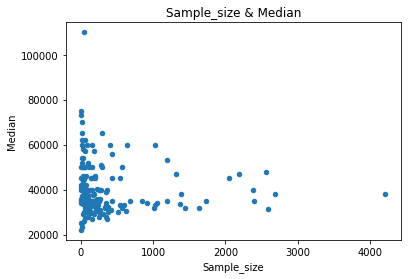

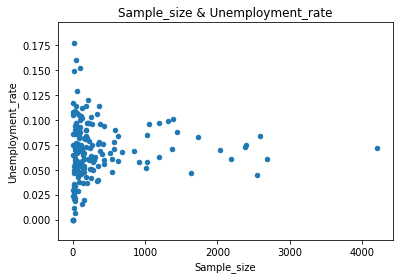

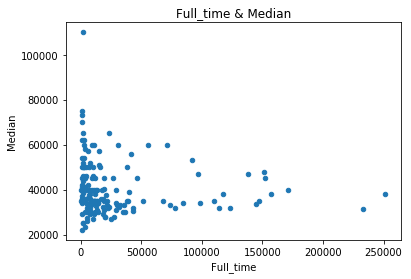

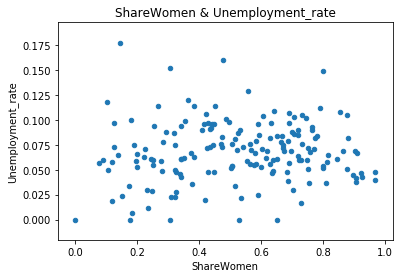

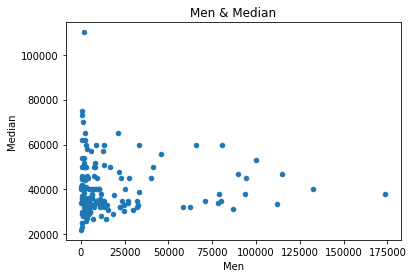

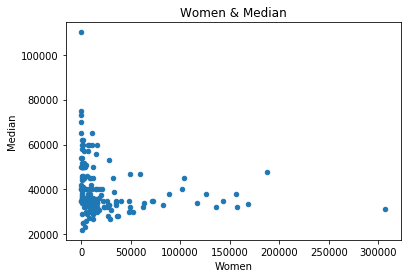

In [7]:
# sample size and median relationship
ax0 = recent_grads.plot(x='Sample_size',y='Median',kind='scatter')
ax0.set_title('Sample_size & Median')
# sample size and Unemployment_rate relationship
ax1 = recent_grads.plot(x='Sample_size',y='Unemployment_rate',kind='scatter')
ax1.set_title('Sample_size & Unemployment_rate')
# Full_time and median relationship
ax2 = recent_grads.plot(x='Full_time',y='Median',kind='scatter')
ax2.set_title('Full_time & Median')
# ShareWomen and Unemployment_rate relationship
ax3 = recent_grads.plot(x='ShareWomen',y='Unemployment_rate',kind='scatter')
ax3.set_title('ShareWomen & Unemployment_rate')
# Men and median relationship
ax4 = recent_grads.plot(x='Men',y='Median',kind='scatter')
ax4.set_title('Men & Median')
# Women and median relationship
ax4 = recent_grads.plot(x='Women',y='Median',kind='scatter')
ax4.set_title('Women & Median')
plt.show()

### Do students in more popular majors make more money?

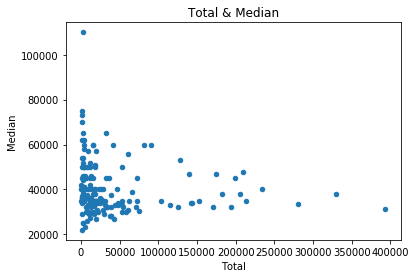

In [8]:
# this is the relationship between total number of students and median
ax = recent_grads.plot(x='Total',y='Median',kind='scatter')
ax.set_title('Total & Median')
plt.show()

From the plot, I conclude there is no relationship between popularity and salary

### Do students that majored in subjects that were majority female make more money?

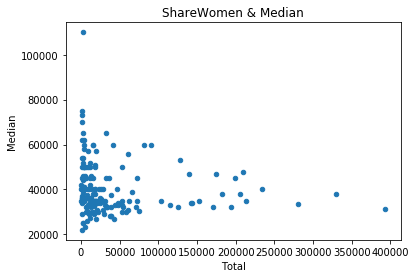

In [9]:
ax = recent_grads.plot(x='Total',y='Median',kind='scatter')
ax.set_title('ShareWomen & Median')
plt.show()

From the shareWomen and median plot, I conclude there is no relationship between two variables

## Visualization: histogram

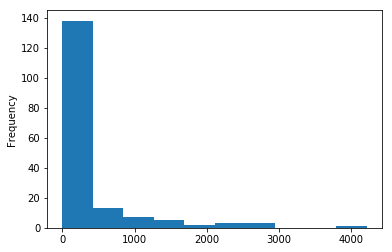

In [10]:
recent_grads['Sample_size'].plot(kind='hist')
plt.show()

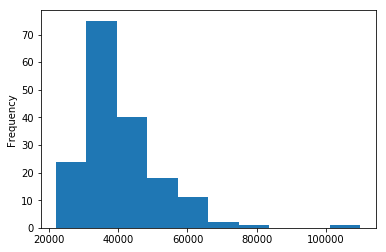

In [11]:
recent_grads['Median'].plot(kind='hist')
plt.show()

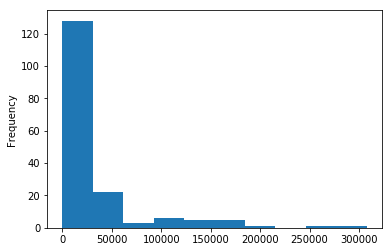

In [12]:
recent_grads['Employed'].plot(kind='hist')
plt.show()

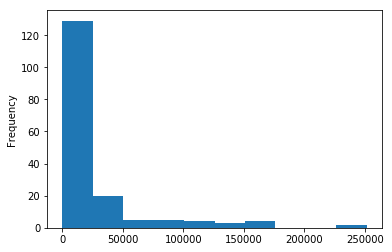

In [13]:
recent_grads['Full_time'].plot(kind='hist')
plt.show()

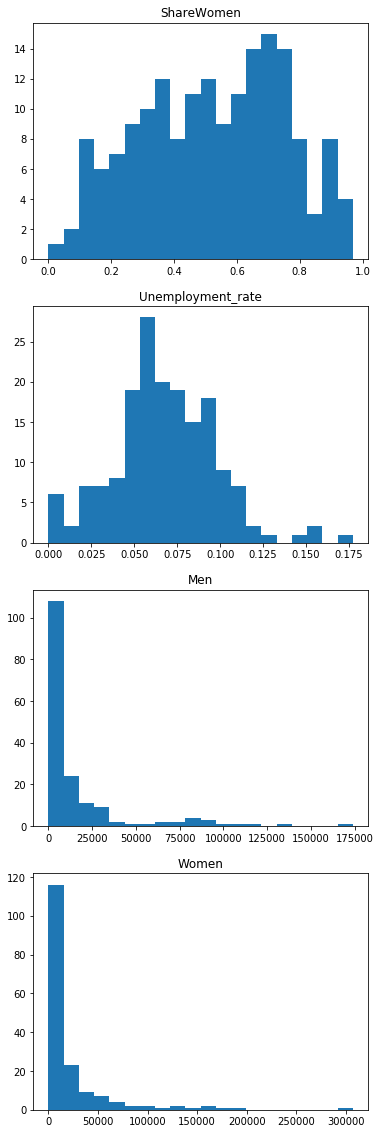

In [14]:
fig= plt.figure(figsize=(6,20))
cols = ['ShareWomen','Unemployment_rate','Men','Women']
for i in range(4):
    ax = fig.add_subplot(4,1,i+1)
    ax.hist(recent_grads[cols[i]],bins=20)
    ax.set_title(cols[i])
plt.show()

From the above plots, we choose Median and ShareWomen histogram to do the analysis.
- The Median shows that the most common median salary range is [30000,40000]
- The ShareWomen hist illustrates that 50% of majors are predominantly female and 33% are predominantly male

## Visualization: scatter_matrix

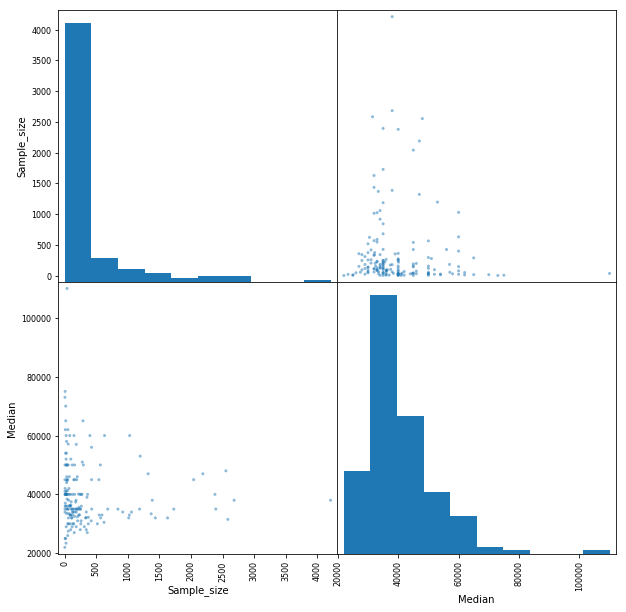

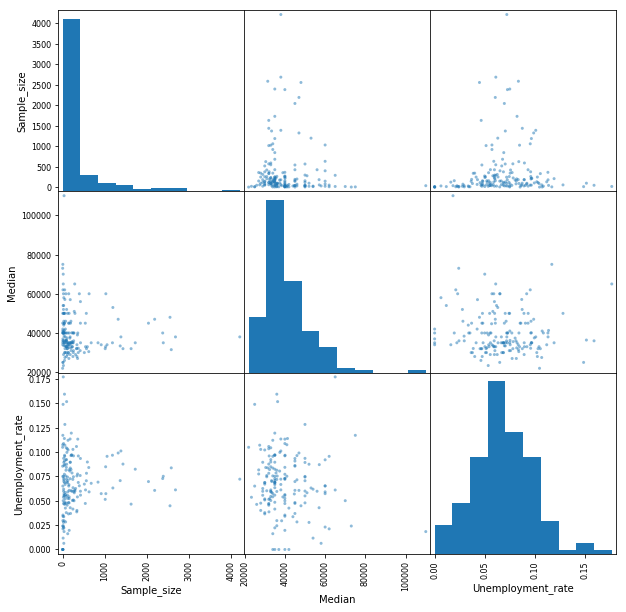

In [15]:
scatter_matrix(recent_grads[['Sample_size','Median']],figsize=(10,10))
scatter_matrix(recent_grads[['Sample_size','Median','Unemployment_rate']],figsize=(10,10))
plt.show()

## Visualization: bar chart

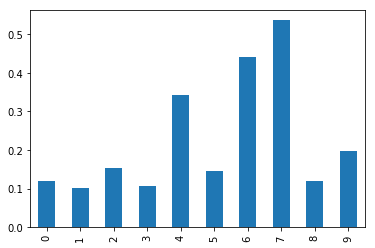

In [16]:
ax1 = recent_grads[0:10]['ShareWomen'].plot(kind='bar')
plt.show()

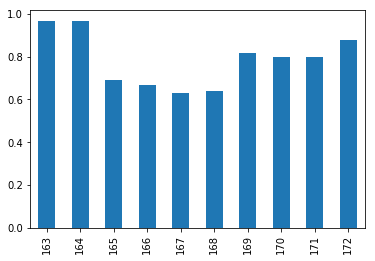

In [17]:
ax2 = recent_grads[-10:]['ShareWomen'].plot(kind='bar')

An interesting finding here: the major whoes students have largest graduate salary has less proportion of women. Vice versa.

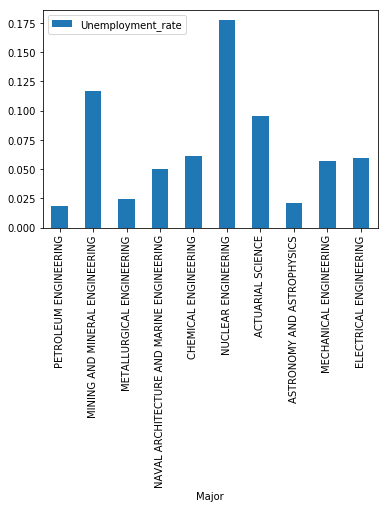

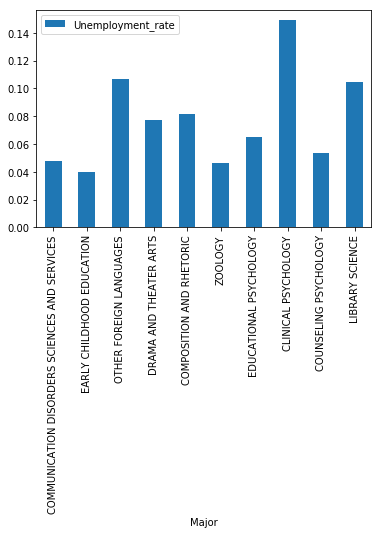

In [18]:
ax1 = recent_grads[0:10].plot.bar(x='Major',y='Unemployment_rate')
ax2 = recent_grads[-10:].plot.bar(x='Major',y='Unemployment_rate')
plt.show()

The unemployment rate has no relationship with major paying condition.